#### Reference model
#### (keras mnist exapmle )

In [1]:
# Credits: https://github.com/keras-team/keras/blob/master/examples/mnist_cnn.py


from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

#https://www.reddit.com/r/tensorflow/comments/gbmvjm/tfkeras_yielding_lower_accuracy_than_keras/fp7avk8?utm_source=share&utm_medium=web2x&context=3
#changed learning rate to 1 from 0.001(default in tensorflow)
#this learning rate works very well for me
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(lr=1),
              metrics=['accuracy'])

history=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Epoch 1/12
469/469 [==============================] - 4s 9ms/step - loss: 0.2550 - accuracy: 0.9214 - val_loss: 0.0524 - val_accuracy: 0.9839
Epoch 2/12
469/469 [==============================] - 4s 8ms/step - loss: 0.0861 - accuracy: 0.9743 - val_loss: 0.0412 - val_accuracy: 0.9860
Epoch 3/12
469/469 [==============================] - 4s 8ms/step - loss: 0.0659 - accuracy: 0.9802 - val_loss: 0.0353 - val_accuracy: 0.9880
Epoch 4/12
469/469 [==============================] - 4s 8ms/step - loss: 0.0524 - accuracy: 0.9844 - val_loss: 0.0362 - val_accuracy: 0.9877
Epoch 5/12
469/469 [==============================] - 4s 8ms/step - loss: 0.0470 - accuracy: 0.9857 - val_loss: 0.0301 - val_accuracy: 0.9910
Epoch 6/12
469/469 [==============================] - 4s 8ms/step - loss: 0.0403 - accuracy: 0.9879 - val_loss: 0.0291 - val_accuracy: 0.9907
Epoch 7/12
469/469 [==============================] - 4s 8ms/step - loss: 0

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import time
# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# https://stackoverflow.com/a/14434334
# this function is used to update the plots for each epoch and error
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

In [3]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1179776   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0

Test score: 0.02598360925912857
Test accuracy: 0.9905999898910522


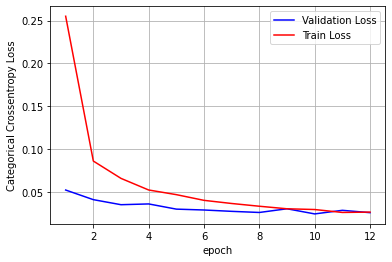

In [4]:
score = model.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
# list of epoch numbers
x = list(range(1,epochs+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

##3-layer architecture+ MaxPooling + Dropout + BatchNormalization

In [5]:
from keras.layers.normalization import BatchNormalization
model = Sequential()

model.add(Conv2D(64, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Dropout(0.125))

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(16, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

#https://www.reddit.com/r/tensorflow/comments/gbmvjm/tfkeras_yielding_lower_accuracy_than_keras/fp7avk8?utm_source=share&utm_medium=web2x&context=3
#changed learning rate to 1 from 0.001(default in tensorflow)
#this learning rate works very well for me
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(lr=1),
              metrics=['accuracy'])

history=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)

Epoch 1/12
469/469 [==============================] - 5s 10ms/step - loss: 0.2595 - accuracy: 0.9181 - val_loss: 0.1301 - val_accuracy: 0.9634
Epoch 2/12
469/469 [==============================] - 4s 9ms/step - loss: 0.0940 - accuracy: 0.9706 - val_loss: 0.0354 - val_accuracy: 0.9887
Epoch 3/12
469/469 [==============================] - 4s 9ms/step - loss: 0.0707 - accuracy: 0.9777 - val_loss: 0.0346 - val_accuracy: 0.9890
Epoch 4/12
469/469 [==============================] - 4s 9ms/step - loss: 0.0608 - accuracy: 0.9805 - val_loss: 0.0271 - val_accuracy: 0.9914
Epoch 5/12
469/469 [==============================] - 4s 9ms/step - loss: 0.0544 - accuracy: 0.9832 - val_loss: 0.0282 - val_accuracy: 0.9904
Epoch 6/12
469/469 [==============================] - 4s 9ms/step - loss: 0.0486 - accuracy: 0.9846 - val_loss: 0.0264 - val_accuracy: 0.9910
Epoch 7/12
469/469 [==============================] - 4s 9ms/step - loss: 0.0460 - accuracy: 0.9857 - val_loss: 0.0279 - val_accuracy: 0.9912
Epoch

In [6]:
 model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
dropout_2 (Dropout)          (None, 26, 26, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 32)        18464     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 12, 12, 32)        128       
_________________________________________________________________
dropout_3 (Dropout)          (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 10, 10, 16)       

Test score: 0.023232409730553627
Test accuracy: 0.9923999905586243


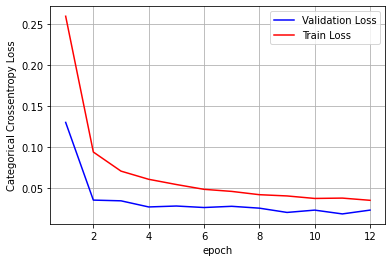

In [7]:
score = model.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
# list of epoch numbers
x = list(range(1,epochs+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

##5-layer architecture+ MaxPooling 

In [8]:
model = Sequential()

model.add(Conv2D(64, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))

model.add(Conv2D(64, (3, 3), activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))

model.add(Conv2D(32, (3, 3), activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))

model.add(Conv2D(32, (3, 3), activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))

model.add(Conv2D(16, (3, 3), activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

#https://www.reddit.com/r/tensorflow/comments/gbmvjm/tfkeras_yielding_lower_accuracy_than_keras/fp7avk8?utm_source=share&utm_medium=web2x&context=3
#changed learning rate to 1 from 0.001(default in tensorflow)
#this learning rate works very well for me
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(lr=1),
              metrics=['accuracy'])

history=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)

Epoch 1/12
469/469 [==============================] - 6s 12ms/step - loss: 0.3565 - accuracy: 0.8842 - val_loss: 0.0597 - val_accuracy: 0.9802
Epoch 2/12
469/469 [==============================] - 5s 11ms/step - loss: 0.0634 - accuracy: 0.9808 - val_loss: 0.0345 - val_accuracy: 0.9876
Epoch 3/12
469/469 [==============================] - 5s 11ms/step - loss: 0.0435 - accuracy: 0.9863 - val_loss: 0.0355 - val_accuracy: 0.9889
Epoch 4/12
469/469 [==============================] - 5s 11ms/step - loss: 0.0347 - accuracy: 0.9892 - val_loss: 0.0337 - val_accuracy: 0.9896
Epoch 5/12
469/469 [==============================] - 5s 11ms/step - loss: 0.0266 - accuracy: 0.9914 - val_loss: 0.0315 - val_accuracy: 0.9902
Epoch 6/12
469/469 [==============================] - 5s 11ms/step - loss: 0.0231 - accuracy: 0.9925 - val_loss: 0.0613 - val_accuracy: 0.9795
Epoch 7/12
469/469 [==============================] - 5s 11ms/step - loss: 0.0186 - accuracy: 0.9940 - val_loss: 0.0303 - val_accuracy: 0.9902

In [9]:
 model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 26, 26, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 13, 13, 32)        18464     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 7, 7, 32)          9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 4, 4, 32)         

Test score: 0.03131846338510513
Test accuracy: 0.991100013256073


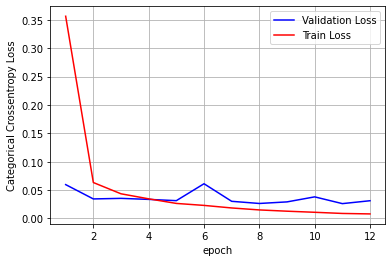

In [10]:
score = model.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
# list of epoch numbers
x = list(range(1,epochs+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

##7-layer architecture
(no MaxPooling)

In [11]:
model = Sequential()

model.add(Conv2D(128, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))

model.add(Conv2D(64, (3, 3), activation='relu'))

model.add(Conv2D(64, (3, 3), activation='relu'))

model.add(Conv2D(32, (3, 3), activation='relu'))

model.add(Conv2D(32, (3, 3), activation='relu'))

model.add(Conv2D(16, (3, 3), activation='relu'))

model.add(Conv2D(16, (3, 3), activation='relu'))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

#https://www.reddit.com/r/tensorflow/comments/gbmvjm/tfkeras_yielding_lower_accuracy_than_keras/fp7avk8?utm_source=share&utm_medium=web2x&context=3
#changed learning rate to 1 from 0.001(default in tensorflow)
#this learning rate works very well for me
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(lr=1),
              metrics=['accuracy'])

history=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)

Epoch 1/12
469/469 [==============================] - 10s 21ms/step - loss: 0.2342 - accuracy: 0.9257 - val_loss: 0.0591 - val_accuracy: 0.9809
Epoch 2/12
469/469 [==============================] - 9s 20ms/step - loss: 0.0523 - accuracy: 0.9844 - val_loss: 0.0428 - val_accuracy: 0.9868
Epoch 3/12
469/469 [==============================] - 9s 20ms/step - loss: 0.0347 - accuracy: 0.9896 - val_loss: 0.0370 - val_accuracy: 0.9887
Epoch 4/12
469/469 [==============================] - 9s 20ms/step - loss: 0.0241 - accuracy: 0.9926 - val_loss: 0.0343 - val_accuracy: 0.9890
Epoch 5/12
469/469 [==============================] - 9s 20ms/step - loss: 0.0167 - accuracy: 0.9948 - val_loss: 0.0424 - val_accuracy: 0.9879
Epoch 6/12
469/469 [==============================] - 9s 20ms/step - loss: 0.0125 - accuracy: 0.9960 - val_loss: 0.0465 - val_accuracy: 0.9891
Epoch 7/12
469/469 [==============================] - 9s 20ms/step - loss: 0.0090 - accuracy: 0.9970 - val_loss: 0.0406 - val_accuracy: 0.988

In [12]:
 model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 26, 26, 128)       1280      
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 24, 24, 64)        73792     
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 22, 22, 64)        36928     
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 20, 20, 32)        18464     
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 18, 18, 32)        9248      
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 16, 16, 16)        4624      
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 14, 14, 16)       

Test score: 0.05189133435487747
Test accuracy: 0.9904999732971191


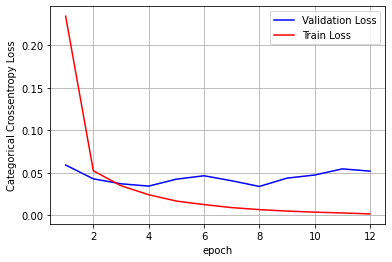

In [13]:
score = model.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
# list of epoch numbers
x = list(range(1,epochs+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

In [7]:
from prettytable import PrettyTable
x = PrettyTable()
print('   *** Architecture ***')
x.field_names = ["# hidden layers","architecture","MaxPooling","Batch_normalization", "dropout"]
x.add_row([3,"[64,32,16]",'yes','yes','yes'])
x.add_row([5,"[64,64,32,32,16]",'yes','no','no'])
x.add_row([7,"[128,64,64,32,32,16,16 ]",'no','no','no'])
print(x)
x = PrettyTable()
print()
print('    *** Perfromance ***')
x.field_names = ["# hidden layers","test_score","test_accuracy"]
x.add_row([3,.0232,.9923])
x.add_row([5,.0313,.9911])
x.add_row([7,.0518,.9905])
print(x)

   *** Architecture ***
+-----------------+--------------------------+------------+---------------------+---------+
| # hidden layers |       architecture       | MaxPooling | Batch_normalization | dropout |
+-----------------+--------------------------+------------+---------------------+---------+
|        3        |        [64,32,16]        |    yes     |         yes         |   yes   |
|        5        |     [64,64,32,32,16]     |    yes     |          no         |    no   |
|        7        | [128,64,64,32,32,16,16 ] |     no     |          no         |    no   |
+-----------------+--------------------------+------------+---------------------+---------+

    *** Perfromance ***
+-----------------+------------+---------------+
| # hidden layers | test_score | test_accuracy |
+-----------------+------------+---------------+
|        3        |   0.0232   |     0.9923    |
|        5        |   0.0313   |     0.9911    |
|        7        |   0.0518   |     0.9905    |
+------------

## observation:
1.CNN with less hidden layers with good engineering(like BatchNormalization,Droupout,MaxPooling) can perform better than CNN with more hidden layers and no engineering(example:7-layer architecture).<br>
2.Utilizing BatchNormalization,MaxPolling,dropout properly results in good increase in performance.<br>
3.Did not observe any decrease in performance greater than 1 to 1.5 % after implementing  several variations of CNN.
4.CNN performs quite good on MNIST dataset with or without engineering.<br>
5.Just increasing the #hidden layers does not make difference without efficient utilization with proper techniques.<br>
6.Dropout layer is helping to regulate overfitting  which can be observed in the second plot. 
